In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import TruncatedSVD
import re
from wordcloud import WordCloud
import seaborn as sns
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
col_names = ["sentiment", "id", "date", "query", "user", "text"]
df = pd.read_csv("/content/training.1600000.processed.noemoticon.csv", names=col_names, encoding="ISO-8859-1", on_bad_lines='skip')

df = df.head(10000)
df.head()

,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [39]:
df.isnull().sum()

,0
sentiment,0
id,0
date,0
query,0
user,0
text,0


In [68]:
p_stem = PorterStemmer()

def Stemming(s):
  stem = re.sub('[^a-zA-Z]',' ',s)
  stem = stem.lower()
  stem = stem.split()
  stem = [p_stem.stem(word) for word in stem if not word in stopwords.words('english')]
  stem = ' '.join(stem)
  return stem

In [41]:
df['Cleaned'] = df['text'].apply(Stemming)

In [42]:
df.head()

,sentiment,id,date,query,user,text,Cleaned
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com zl awww bummer sho...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see


In [118]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Cleaned'])
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 73380 stored elements and shape (10000, 13128)>
  Coords	Values
  (0, 11149)	0.3665104232491464
  (0, 5203)	0.17634583426463998
  (0, 11944)	0.22166681915643452
  (0, 2223)	0.18214438654312537
  (0, 13102)	0.3665104232491464
  (0, 780)	0.2501940314211631
  (0, 1544)	0.2798133031959108
  (0, 10234)	0.33981736446184735
  (0, 4570)	0.16228045067184355
  (0, 2720)	0.29157353327784946
  (0, 1732)	0.3665104232491464
  (0, 11472)	0.3085884876216168
  (0, 2735)	0.14371644150075735
  (1, 12162)	0.32028282049043355
  (1, 12152)	0.2867826294289714
  (1, 3784)	0.3164143116436197
  (1, 11366)	0.33073300430245534
  (1, 7296)	0.2940095817967677
  (1, 2487)	0.2765379886117089
  (1, 9491)	0.3695108582430312
  (1, 9945)	0.2393786028439966
  (1, 11626)	0.19039591619963836
  (1, 331)	0.29247514944340813
  (1, 1181)	0.35654550967366766
  (2, 6111)	0.4182330105574242
  :	:
  (9995, 9794)	0.5945902948671059
  (9995, 778)	0.8040288435434689
  (9996

In [119]:
svd = TruncatedSVD(n_components=50, random_state=42)
X_fit = svd.fit_transform(X)

In [147]:
model = DBSCAN(eps=0.5, min_samples=2, metric="euclidean")
dbmodel = model.fit_predict(X_fit)

df['Cluster'] = dbmodel
dblabels = model.labels_

n = len(set(dbmodel)) - (1 if -1 in dbmodel else 0)
print("Number of clusters (excluding noise):", n)
print("Number of noise points:", list(dbmodel).count(-1))

Number of clusters (excluding noise): 4
Number of noise points: 93


In [148]:
m = dblabels != -1

if n > 1:
  s_score = silhouette_score(X_fit[m], dblabels[m])
  print("Silhouette Score:", round(s_score, 4))
else:
  print("Silhouette Score: Not applicable")

Silhouette Score: 0.5151



Cluster 0: Trends: 
work     217.767796
go       187.172401
get      146.815175
day      144.867401
today    124.002175
feel     116.423898
want     111.566839
miss     106.931387
like     104.759067
still     95.773301
Name: 0, dtype: float64


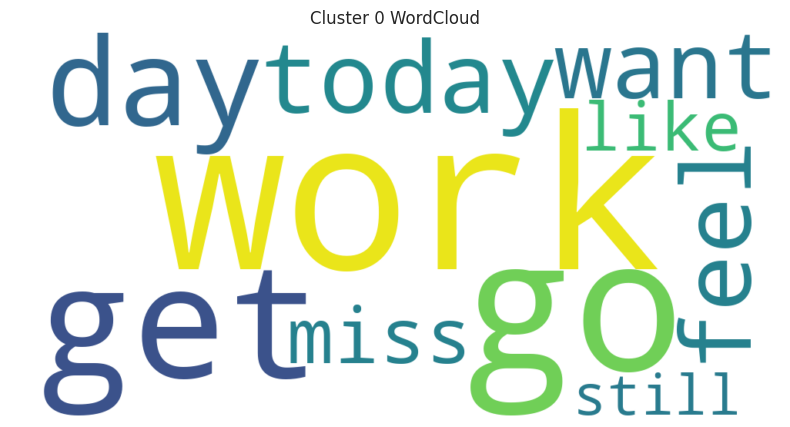


Cluster 1: Trends: 
realli           1.511415
sad              1.127123
know             0.413927
pinktowerladi    0.000000
pinnacl          0.000000
pip              0.000000
pirat            0.000000
pirg             0.000000
piroton          0.000000
pirro            0.000000
Name: 1, dtype: float64


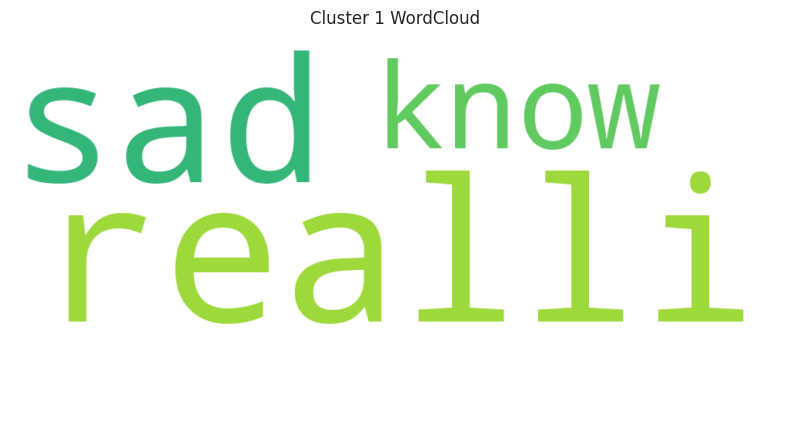


Cluster 2: Trends: 
bed        1.248464
want       1.045769
get        0.911175
back       0.499776
pirat      0.000000
pirg       0.000000
piroton    0.000000
pirro      0.000000
pish       0.000000
piss       0.000000
Name: 2, dtype: float64


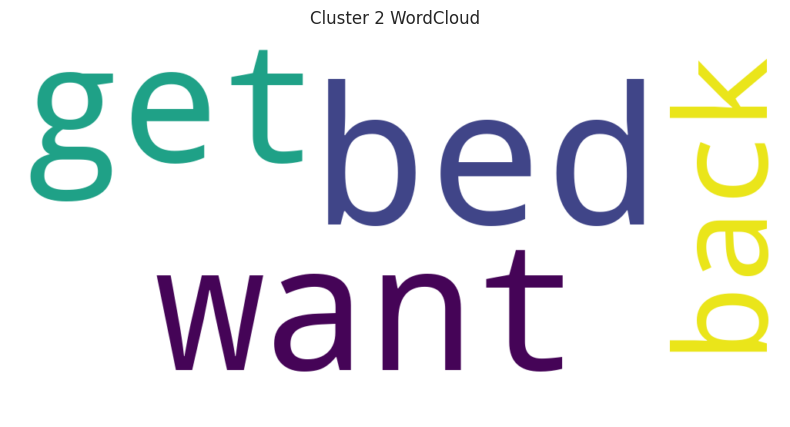


Cluster 3: Trends: 
back            1.319975
work            1.070240
go              1.054633
pinkserendip    0.000000
pinnacl         0.000000
pip             0.000000
pirat           0.000000
pirg            0.000000
piroton         0.000000
pirro           0.000000
Name: 3, dtype: float64


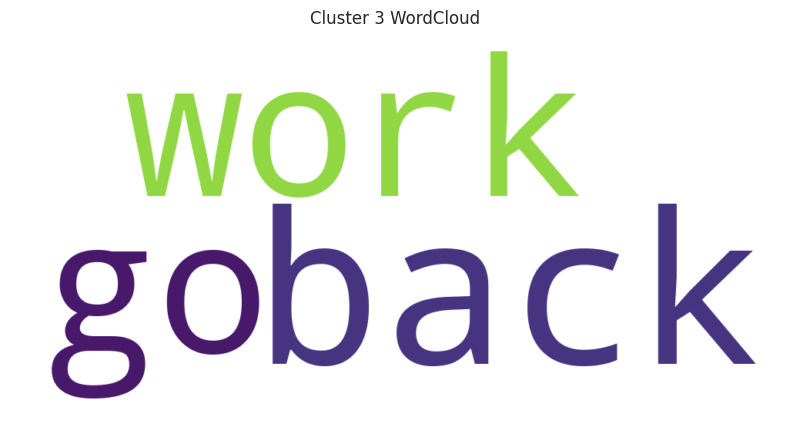

In [136]:
words = vectorizer.get_feature_names_out()
df_w = pd.DataFrame(X.toarray(), columns=words)
df_w['Cluster'] = dbmodel
word_sum = df_w.groupby('Cluster').sum()

for i in sorted(word_sum.index):
  if i == -1:
    continue
  print(f"\nCluster {i}: Trends: ")
  trend = word_sum.loc[i].sort_values(ascending=False)[:10]
  print(trend)

  w_c = WordCloud(background_color='white', width=1000, height=500)
  w_c.generate_from_frequencies(trend.to_dict())
  plt.figure(figsize=(10, 5))
  plt.imshow(w_c, interpolation='bilinear')
  plt.axis('off')
  plt.title(f"Cluster {i} WordCloud")
  plt.show()

In [51]:
svd = TruncatedSVD(n_components=50, random_state=42)
X_fit = svd.fit_transform(X)

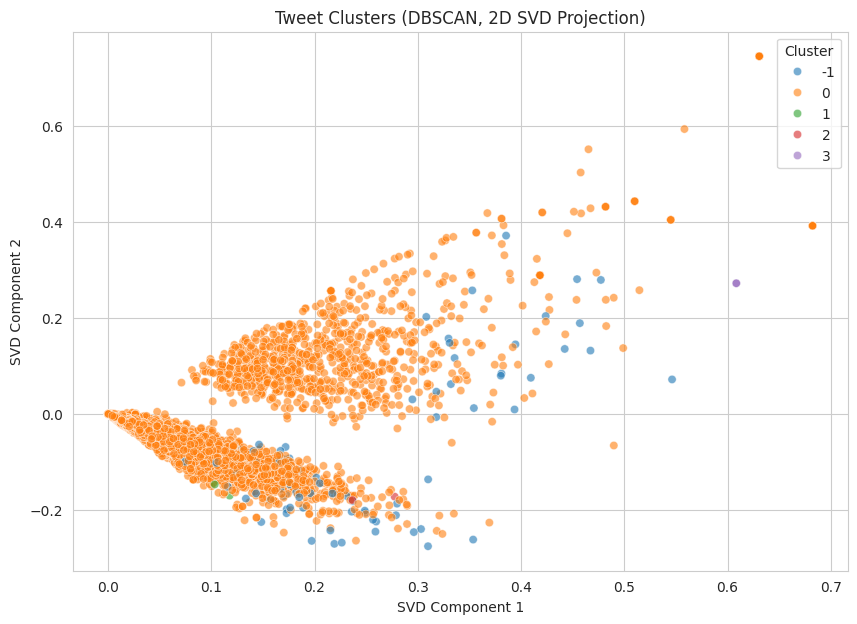

In [137]:
sns.set_style("whitegrid")

plt.figure(figsize=(10,7))
sns.scatterplot(x=X_fit[:,0], y=X_fit[:,1], hue=df["Cluster"],
                palette="tab10", legend="full", alpha=0.6)
plt.title("Tweet Clusters (DBSCAN, 2D SVD Projection)")
plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.show()